- We can measure skew quantitatively with scipy.stats.skew() or pandas.DataFrame.skew()
- We can also observe skew using a Q-Q plot

In [ ]:

!pip install -q scikit-learn
!pip install -q statsmodels


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

df = fetch_california_housing(as_frame=True).frame
df['Population'].hist(bins=50)
print(f"Skew of population column is {df['Population'].skew()}")
print("this indicates a strong positive skew")

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df['Population'].describe()

In [ ]:
# q-q plot of HouseAge:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


# scaleHouseAge: 


qq_plot = qqplot(df['Population'] , scale=1 ,line='q', fit=True)
pyplot.show()

### Methods for Correcting Skew
1. Log Transform
- This is most commonly used transform for correcting right-skewed data
- Can convert exponential relationships into linear ones
- Reduces the effect of outliers
- Easily done by np.log()
- Data should not have null values
- Handle values at 0 (np.log(0) encounters divide by zero)

In [1]:

! pip install -q scikit-learn
! pip install -q statsmodels

Skew of population column is 4.93585822672712
this indicates a strong positive skew


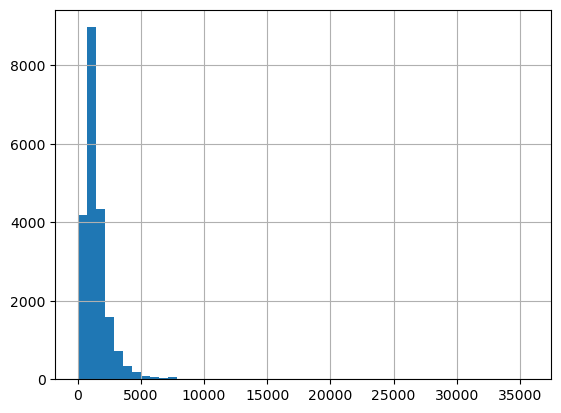

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

df = fetch_california_housing(as_frame=True).frame
df['Population'].hist(bins=50)
print(f"Skew of population column is {df['Population'].skew()}")
print("this indicates a strong positive skew")

In [5]:
df['Population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64

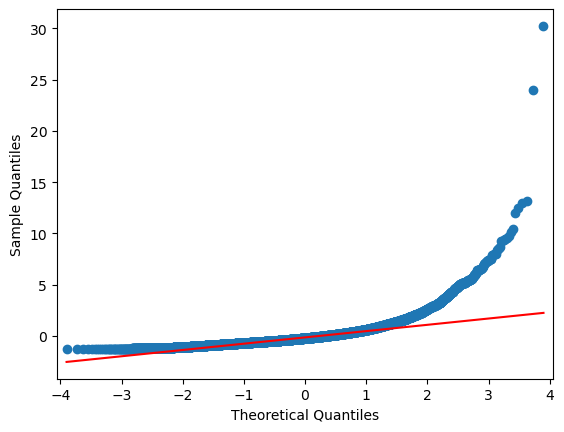

In [6]:
# q-q plot of HouseAge:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


# scaleHouseAge: 


qq_plot = qqplot(df['Population'] , scale=1 ,line='q', fit=True)
pyplot.show()

### Methods for Correcting Skew


### Log Transform
- Easily done by np.log()
- Data should not have null values
- Handle values at 0 (np.log(0) encounters divide by zero)

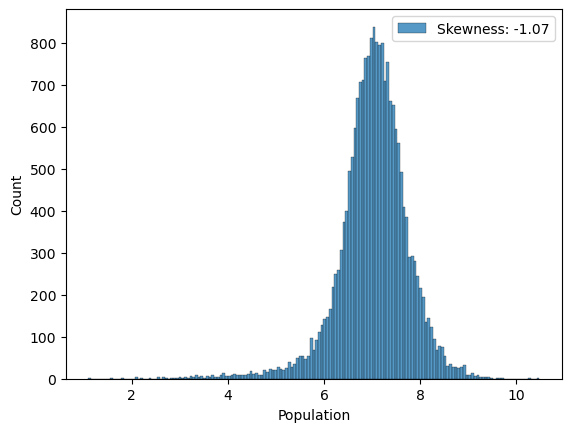

In [7]:
import numpy as np
import seaborn as sns
log_population = df["Population"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_population,label="Skewness: %.2f"%(log_population.skew()) )
t.legend()

2. Box-Cox Transform
- Data must be positive
- Can be optimised via a parameter λ, which allows for a more direct approach to targeting normality
- The log transform is a special case of the Box-Cox transform (with λ = 0 )

``` scss
y = (x**λ - 1) / λ,  for λ ≠ 0
y = log(x), for λ = 0

```

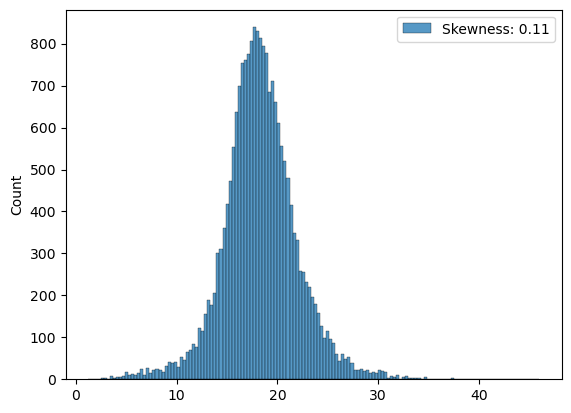

In [8]:
from scipy import stats
boxcox_population = df["Population"]
boxcox_population= stats.boxcox(boxcox_population)
boxcox_population= pd.Series(boxcox_population[0])
t=sns.histplot(boxcox_population,label="Skewness: %.2f"%(boxcox_population.skew()) )
t.legend()

### Yeo-Johnson Transform

- Generalises the Box-Cox family of transforms to handle negative values
- Optimised via a single parameter, per Box-Cox
- Useful when the underlying distribution contains both positive and negative values
- Unnecessarily complicated for 'count' type data

```scss
For y ≥ 0 and λ ≠ 0: ((y^(λ) - 1) / λ)
For y ≥ 0 and λ = 0: log(y)
For y < 0 and λ ≠ 2: -((-y^(2-λ) - 1) / (2 - λ))
For y < 0 and λ = 2: -log(-y)
```

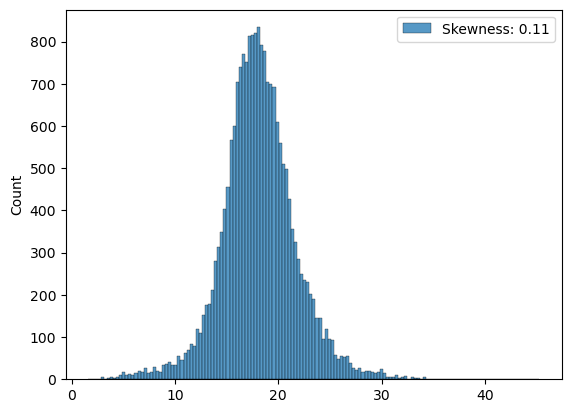

In [9]:
from scipy.stats import yeojohnson
yeojohnson_population = df["Population"]
yeojohnson_population = stats.yeojohnson(yeojohnson_population)
yeojohnson_population= pd.Series(yeojohnson_population[0])
t=sns.histplot(yeojohnson_population,label="Skewness: %.2f"%(yeojohnson_population.skew()) )
t.legend()